In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
json_file='cases_all_germany.json'
df = pd.read_json(json_file)
df = df.sbort_values(by='Date', ascending=True)
df

,Date,Confirmed,Deaths,Recovered
0,2020-01-01,20,0,20
1,2020-01-02,38,0,38
2,2020-01-03,59,1,58
3,2020-01-04,84,2,82
4,2020-01-05,106,2,104
...,...,...,...,...
1380,2023-10-12,38516749,176365,38312264
1381,2023-10-13,38518339,176370,38312264
1382,2023-10-14,38518535,176370,38312264
1383,2023-10-15,38518667,176370,38312264


In [76]:
start_date = '2020-10-10'
end_date = '2021-07-10'
df_by_date=df.loc[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [77]:

def plot_data_dcr(df,column_d:str,column_c:str,column_r:str,output_filename=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['Date'], df[column_d], label='Daily Deaths', color='red')
    ax.plot(df['Date'], df[column_c], label='Daily Confirmed', color='blue')
    ax.plot(df['Date'], df[column_r], label='Daily Recovered', color='orange')

    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.set_title('COVID-19 Deaths and Cases Over Time')

    plt.xticks(rotation=45)

    ax.legend()
    
    plt.tight_layout()
    if output_filename:
        # Save the image to the specified output filename
        plt.savefig(output_filename)
    else:
        # Display the plot
        plt.show()
    

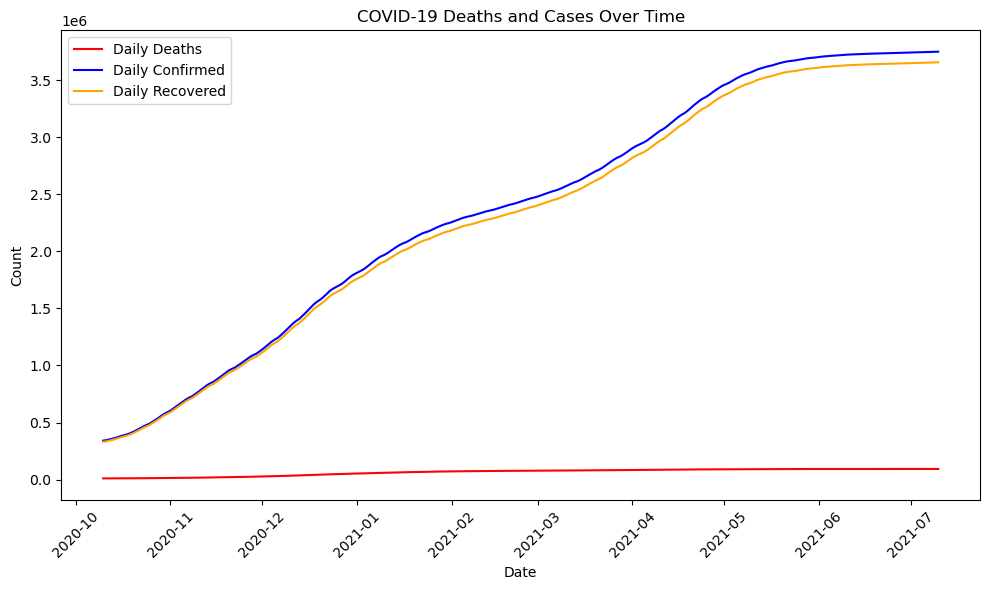

In [79]:
plot_data_dcr(df_by_date,'Deaths','Confirmed','Recovered')

In [80]:
#solving for cumulative value

In [81]:
def solve_comulative_data(df,former_c1,new_c1,former_c2,new_c2,former_c3,new_c3):
    df[new_c1] = df[former_c1].diff().fillna(df[former_c1][0]).astype(int)
    df[new_c2] = df[former_c2].diff().fillna(df[former_c2][0]).astype(int)
    df[new_c3] = df[former_c3].diff().fillna(df[former_c3][0]).astype(int)

    return df

In [82]:
def s_comulative_data(df,former_c1,new_c1,former_c2,new_c2,former_c3,new_c3):
    df[new_c1] = df[former_c1].diff().fillna(0).astype(int).copy()
    df[new_c2] = df[former_c2].diff().fillna(0).astype(int).copy()
    df[new_c3] = df[former_c3].diff().fillna(0).astype(int).copy()
    df.to_csv('new_german_rdc_3_8.csv', index=False)

    return df


In [83]:
w_df=s_comulative_data(df_by_date,'Confirmed','n_confirmed','Deaths','n_death','Recovered','n_recovered')
w_df.tail()

C:\Users\kida_ev\AppData\Local\Temp\ipykernel_29204\2834750910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_c1] = df[former_c1].diff().fillna(0).astype(int).copy()
C:\Users\kida_ev\AppData\Local\Temp\ipykernel_29204\2834750910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_c2] = df[former_c2].diff().fillna(0).astype(int).copy()
C:\Users\kida_ev\AppData\Local\Temp\ipykernel_29204\2834750910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Date,Confirmed,Deaths,Recovered,n_confirmed,n_death,n_recovered
552,2021-07-06,3746471,92912,3653559,1036,7,1029
553,2021-07-07,3747501,92918,3654583,1030,6,1024
554,2021-07-08,3748568,92922,3655646,1067,4,1063
555,2021-07-09,3749620,92927,3656693,1052,5,1047
556,2021-07-10,3750703,92932,3657771,1083,5,1078


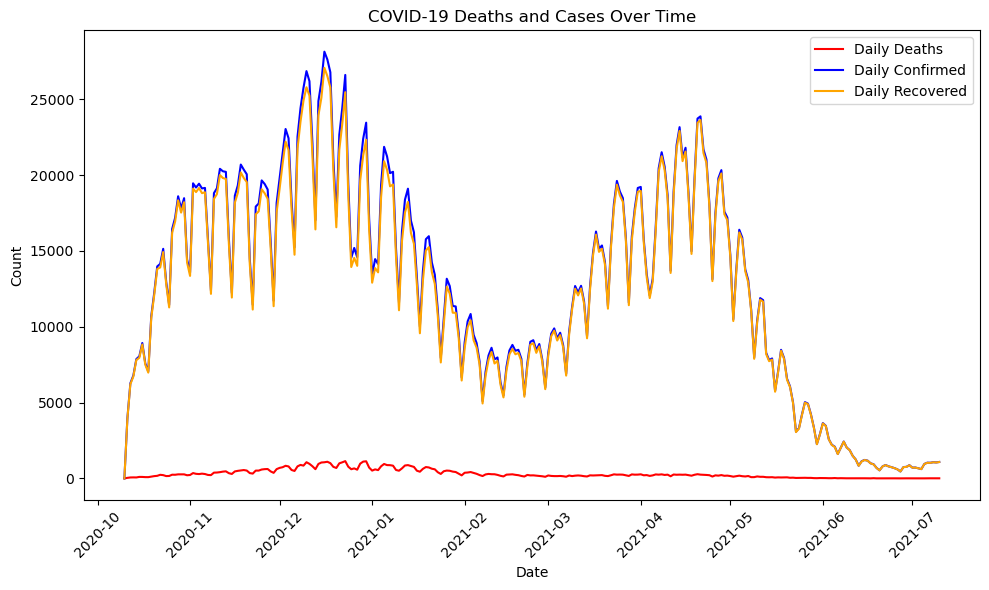

In [84]:
plot_data_dcr(w_df,'n_death','n_confirmed','n_recovered')